In [3]:
import pandas as pd
#is this committing correctly?
# List of column headers you want to select
selected_columns = ['frequency(MHz)', 'rise time(ns)', 'fall time(ns)']  # Replace these with actual column headers

# Assuming 'test.txt' is a comma-separated values (CSV) file
data = pd.read_csv('rise_fall_15_08_24.txt', usecols=selected_columns)

# Now `data` contains only the selected columns from 'test.txt'
print(data)

ValueError: Usecols do not match columns, columns expected but not found: ['rise time(ns)', 'fall time(ns)']

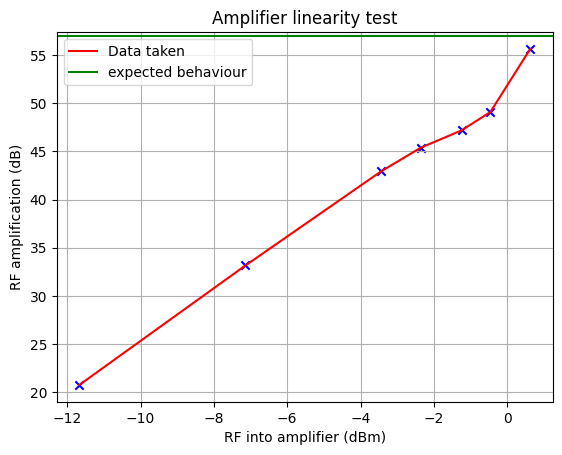

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

# Define the function you want to plot
def custom_function(x, m, c):
    return m * x + c

# Use the data loaded from the previous step
x_data = data['Ch A power(dBm)'].values  # Replace 'x_column' with the actual column name for x
y_data = data['Amplification level (dB)'].values  # Replace 'y_column' with the actual column name for y
IN_WATTS = False #set to true if wanted

if IN_WATTS:
    x_data_watts =10**(x_data/10)
    y_data_watts =10**(y_data/10)/1000
else:
    pass
'''
# Perform the chi-squared fit
popt, pcov = curve_fit(custom_function, x_data, y_data)

# Optimal values for m and c
m_optimal, c_optimal = popt

#calculate chi^2
residuals = y_data - custom_function(x_data, *popt)
chi_squared = np.sum(residuals**2)
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label='Data')

# Plot the fitted function

plt.plot(x_fit, y_fit, color='red', label=f'label')
'''

# Display function and fit parameters in the graph
#plt.text(0.05, 0.95, f'Fit: y = {m_optimal:.2f}x + {c_optimal:.2f}, Chi^2 ={chi_squared:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
title = 'Amplifier linearity test'
label = 'Data taken'
#plt.axis([-10, 0, 0, 50])
#plt.xlim=[-10,0]
#plt.ylim=[0,50]

if IN_WATTS:
    
    plt.plot(x_data_watts, y_data_watts, color='red', label=f'{label}')
    plt.scatter(x_data_watts, y_data_watts, marker = 'x', c='b')
    plt.xlabel('RF In to amp (mW) ')
    plt.ylabel('calculated RF out power (W)')
else:
    plt.plot(x_data, y_data, color='red', label=f'{label}')
    plt.scatter(x_data, y_data, marker = 'x', c='b')
    plt.xlabel('RF into amplifier (dBm)')
    plt.ylabel('RF amplification (dB)')


#Mingee suggests plotting a y=ax with a=500,118 
'''
fit_x = np.arange(-10,1,1)
fit_y= fit_x*4 +50
plt.plot(fit_x, fit_y, color='green', label=f'y=4*x+50')
'''
plt.axhline(y = 57, color = 'g', linestyle = '-', label='expected behaviour') 

plt.title(f'{title}')
plt.legend()
plt.grid(True)
plt.show()